# Covid Timeseries Modelling

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.preprocessing import MinMaxScaler
import torch
from torch import nn, optim
import numpy as np
import plotly.express as px

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
full_grouped = pd.read_csv('COVID-19-complete-03-sep.csv', parse_dates=['Date'], index_col=0, header = 0)
full_grouped.head()

,Country/Region,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,Afghanistan,2020-01-22,0,0,0.0,0.0,0,0,0
1,Albania,2020-01-22,0,0,0.0,0.0,0,0,0
2,Algeria,2020-01-22,0,0,0.0,0.0,0,0,0
3,Andorra,2020-01-22,0,0,0.0,0.0,0,0,0
4,Angola,2020-01-22,0,0,0.0,0.0,0,0,0


In [4]:
full_grouped

,Country/Region,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,Afghanistan,2020-01-22,0,0,0.0,0.0,0,0,0
1,Albania,2020-01-22,0,0,0.0,0.0,0,0,0
2,Algeria,2020-01-22,0,0,0.0,0.0,0,0,0
3,Andorra,2020-01-22,0,0,0.0,0.0,0,0,0
4,Angola,2020-01-22,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...
41845,West Bank and Gaza,2020-09-02,23875,162,15483.0,8230.0,594,3,145
41846,Western Sahara,2020-09-02,10,1,8.0,1.0,0,0,0
41847,Yemen,2020-09-02,1976,571,0.0,1405.0,14,1,0
41848,Zambia,2020-09-02,12415,292,11494.0,629.0,34,2,15


In [5]:
canada = full_grouped[full_grouped['Country/Region'] == 'Canada']
canada.head()

,Country/Region,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
32,Canada,2020-01-22,0,0,0.0,0.0,0,0,0
218,Canada,2020-01-23,0,0,0.0,0.0,0,0,0
404,Canada,2020-01-24,0,0,0.0,0.0,0,0,0
590,Canada,2020-01-25,0,0,0.0,0.0,0,0,0
776,Canada,2020-01-26,1,0,0.0,1.0,1,0,0


In [6]:
# canada[['Date', 'New cases']]
daily_cases = canada.drop(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New deaths', 'New recovered'],axis=1)  
daily_cases.shape
# df.drop(['B', 'C'], axis=1)

(225, 2)

In [7]:
# daily_cases = canada[['Date', 'New cases']]
daily_cases.head()

,Date,New cases
32,2020-01-22,0
218,2020-01-23,0
404,2020-01-24,0
590,2020-01-25,0
776,2020-01-26,1


In [8]:
daily_cases.isnull().sum().sum()

0

In [9]:
daily_cases = daily_cases.set_index('Date')
daily_cases.index = pd.to_datetime(daily_cases.index)
daily_cases.head()

,New cases
Date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,1


In [10]:
# series.reset_index(drop=True, inplace=True)

In [11]:
daily_cases.shape

(225, 1)

## Moving Average

1. Moving average can be used as a data preparation technique to create a smoothed version of the original dataset.

In [12]:
# # Tail-rolling average transform
# rolling = series.rolling(window=3)
# rolling_mean = rolling.mean()
# print(rolling_mean.head(10))
# # plot original and transformed dataset
# series.plot()
# rolling_mean.plot(color='red')
# plt.show()

In [13]:
# rolling_mean.drop[index=[0,1]]

# LSTM

In [14]:
daily_cases

,New cases
Date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,1
...,...
2020-08-29,297
2020-08-30,249
2020-08-31,1030


In [15]:
daily_cases.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-08-24', '2020-08-25', '2020-08-26', '2020-08-27',
               '2020-08-28', '2020-08-29', '2020-08-30', '2020-08-31',
               '2020-09-01', '2020-09-02'],
              dtype='datetime64[ns]', name='Date', length=225, freq=None)

In [16]:
test_data_size = 47
train_data = daily_cases[:-test_data_size]
test_data = daily_cases[-test_data_size:]
train_data.shape

(178, 1)

In [17]:
# test_data

In [18]:
scaler = MinMaxScaler()
scaler = scaler.fit(np.expand_dims(train_data['New cases'], axis=1))
train_data = scaler.transform(np.expand_dims(train_data['New cases'], axis=1))
test_data = scaler.transform(np.expand_dims(test_data['New cases'], axis=1))

In [19]:
train_data[:10]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.00035997],
       [0.        ],
       [0.00035997],
       [0.        ],
       [0.        ],
       [0.00071994]])

In [20]:
test_data[:10]

array([[0.1137509 ],
       [0.10547156],
       [0.27717783],
       [0.19258459],
       [0.11411087],
       [0.21886249],
       [0.25809935],
       [0.12778978],
       [0.11483081],
       [0.24550036]])

In [21]:
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [22]:
seq_length = 21
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

In [23]:
X_train.shape

torch.Size([156, 21, 1])

In [24]:
X_train[:2]

tensor([[[0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0004],
         [0.0000],
         [0.0004],
         [0.0000],
         [0.0000],
         [0.0007],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0004],
         [0.0000],
         [0.0007],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000]],

        [[0.0000],
         [0.0000],
         [0.0000],
         [0.0004],
         [0.0000],
         [0.0004],
         [0.0000],
         [0.0000],
         [0.0007],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0004],
         [0.0000],
         [0.0007],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000]]])

In [25]:
y_train.shape

torch.Size([156, 1])

In [26]:
y_train[:2]

tensor([[0.],
        [0.]])

In [27]:
X_test.shape

torch.Size([25, 21, 1])

In [28]:
X_test[:2]

tensor([[[0.1138],
         [0.1055],
         [0.2772],
         [0.1926],
         [0.1141],
         [0.2189],
         [0.2581],
         [0.1278],
         [0.1148],
         [0.2455],
         [0.1440],
         [0.1749],
         [0.1152],
         [0.2174],
         [0.0871],
         [0.0882],
         [0.0738],
         [0.2469],
         [0.1346],
         [0.1274],
         [0.1857]],

        [[0.1055],
         [0.2772],
         [0.1926],
         [0.1141],
         [0.2189],
         [0.2581],
         [0.1278],
         [0.1148],
         [0.2455],
         [0.1440],
         [0.1749],
         [0.1152],
         [0.2174],
         [0.0871],
         [0.0882],
         [0.0738],
         [0.2469],
         [0.1346],
         [0.1274],
         [0.1857],
         [0.0882]]])

In [29]:
y_test.shape

torch.Size([25, 1])

In [30]:
y_test[:2]

tensor([[0.0882],
        [0.0788]])

In [35]:
class CoronaVirusPredictor(nn.Module):
  def __init__(self, n_features, n_hidden, seq_len, n_layers=2):
    super(CoronaVirusPredictor, self).__init__()
    self.n_hidden = n_hidden
    self.seq_len = seq_len
    self.n_layers = n_layers
    self.lstm = nn.LSTM(
      input_size=n_features,
      hidden_size=n_hidden,
      num_layers=n_layers,
      dropout=0.5
    )
    self.linear = nn.Linear(in_features=n_hidden, out_features=1)
    
  def reset_hidden_state(self):
    self.hidden = (
        torch.zeros(self.n_layers, self.seq_len, self.n_hidden),
        torch.zeros(self.n_layers, self.seq_len, self.n_hidden)
    )
    
  def forward(self, sequences):
    lstm_out, self.hidden = self.lstm(
      sequences.view(len(sequences), self.seq_len, -1),
      self.hidden
    )
    last_time_step = \
      lstm_out.view(self.seq_len, len(sequences), self.n_hidden)[-1]
    y_pred = self.linear(last_time_step)
    return y_pred

In [61]:
def train_model(
  model,
  train_data,
  train_labels,
  test_data=None,
  test_labels=None
):
  loss_fn = torch.nn.MSELoss(reduction='sum')

  optimiser = torch.optim.Adam(model.parameters(), lr=1e-5)
    
  num_epochs = 1000

  train_hist = np.zeros(num_epochs)
    
  test_hist = np.zeros(num_epochs)

  for t in range(num_epochs):
    model.reset_hidden_state()
    y_pred = model(X_train)
    loss = loss_fn(y_pred.float(), y_train)
    
    if test_data is not None:
      with torch.no_grad():
        y_test_pred = model(X_test)
        test_loss = loss_fn(y_test_pred.float(), y_test)
      test_hist[t] = test_loss.item()
      if t % 10 == 0:
        print(f'Epoch {t} train loss: {loss.item()} test loss: {test_loss.item()}')
    elif t % 10 == 0:
      print(f'Epoch {t} train loss: {loss.item()}')
    train_hist[t] = loss.item()
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    
  return model.eval(), train_hist, test_hist

In [62]:
model = CoronaVirusPredictor(
  n_features=1,
  n_hidden=128,
  seq_len=seq_length,
  n_layers=2
)
model, train_hist, test_hist = train_model(
  model,
  X_train,
  y_train,
  X_test,
  y_test
)

Epoch 0 train loss: 12.643534660339355 test loss: 0.2690757215023041
Epoch 10 train loss: 12.447915077209473 test loss: 0.258086621761322
Epoch 20 train loss: 12.193963050842285 test loss: 0.24456819891929626
Epoch 30 train loss: 11.95717716217041 test loss: 0.23379087448120117
Epoch 40 train loss: 11.765547752380371 test loss: 0.2223663032054901
Epoch 50 train loss: 11.647228240966797 test loss: 0.2053355872631073
Epoch 60 train loss: 11.424375534057617 test loss: 0.2038399875164032
Epoch 70 train loss: 11.216714859008789 test loss: 0.19686762988567352
Epoch 80 train loss: 11.046435356140137 test loss: 0.18889343738555908
Epoch 90 train loss: 10.869202613830566 test loss: 0.18519538640975952
Epoch 100 train loss: 10.69572639465332 test loss: 0.17317980527877808
Epoch 110 train loss: 10.530759811401367 test loss: 0.17376573383808136
Epoch 120 train loss: 10.371621131896973 test loss: 0.1680460125207901
Epoch 130 train loss: 10.210175514221191 test loss: 0.16456979513168335
Epoch 140 tr

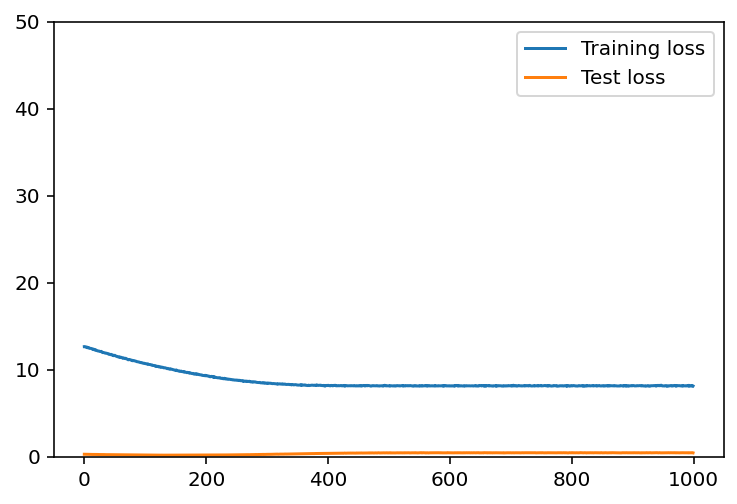

In [63]:
plt.plot(train_hist, label="Training loss")
plt.plot(test_hist, label="Test loss")
plt.ylim((0, 50))
plt.legend();

# Daily Cases Prediction

In [64]:
with torch.no_grad():
  test_seq = X_test[:1]
  preds = []
  for _ in range(len(X_test)):
    y_test_pred = model(test_seq)
    pred = torch.flatten(y_test_pred).item()
    preds.append(pred)
    new_seq = test_seq.numpy().flatten()
    new_seq = np.append(new_seq, [pred])
    new_seq = new_seq[1:]
    test_seq = torch.as_tensor(new_seq).view(1, seq_length, 1).float()

In [65]:
true_cases = scaler.inverse_transform(
    np.expand_dims(y_test.flatten().numpy(), axis=0)
).flatten()
predicted_cases = scaler.inverse_transform(
  np.expand_dims(preds, axis=0)
).flatten()

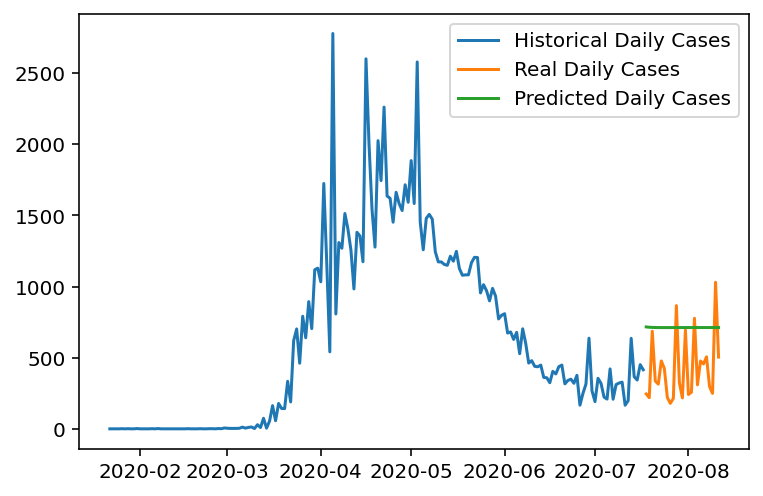

In [66]:
plt.plot(
  daily_cases.index[:len(train_data)],
  scaler.inverse_transform(train_data).flatten(),
  label='Historical Daily Cases'
)
plt.plot(
  daily_cases.index[len(train_data):len(train_data) + len(true_cases)],
  true_cases,
  label='Real Daily Cases'
)
plt.plot(
  daily_cases.index[len(train_data):len(train_data) + len(true_cases)],
  predicted_cases,
  label='Predicted Daily Cases'
)
plt.legend();

## Using All Data for Training

In [52]:
scaler = MinMaxScaler()
scaler = scaler.fit(np.expand_dims(daily_cases['New cases'], axis=1))
all_data = scaler.transform(np.expand_dims(daily_cases['New cases'], axis=1))
all_data.shape

(225, 1)

In [53]:
X_all, y_all = create_sequences(all_data, seq_length)
X_all = torch.from_numpy(X_all).float()
y_all = torch.from_numpy(y_all).float()
model = CoronaVirusPredictor(
  n_features=1,
  n_hidden=100,
  seq_len=seq_length,
  n_layers=2
)
model, train_hist, _ = train_model(model, X_all, y_all)

Epoch 0 train loss: 15.985953330993652
Epoch 10 train loss: 8.193687438964844
Epoch 20 train loss: 8.207362174987793
Epoch 30 train loss: 8.188924789428711
Epoch 40 train loss: 8.166810035705566
Epoch 50 train loss: 8.132048606872559
Epoch 60 train loss: 8.127018928527832
Epoch 70 train loss: 8.137188911437988
Epoch 80 train loss: 8.100286483764648
Epoch 90 train loss: 8.142196655273438
Epoch 100 train loss: 8.155620574951172
Epoch 110 train loss: 8.14154052734375
Epoch 120 train loss: 8.131197929382324
Epoch 130 train loss: 8.164223670959473
Epoch 140 train loss: 8.135916709899902
Epoch 150 train loss: 8.155842781066895
Epoch 160 train loss: 8.16070556640625
Epoch 170 train loss: 8.17951488494873
Epoch 180 train loss: 8.158507347106934
Epoch 190 train loss: 8.170045852661133
Epoch 200 train loss: 8.132844924926758
Epoch 210 train loss: 8.097430229187012
Epoch 220 train loss: 8.116544723510742
Epoch 230 train loss: 8.13879108428955
Epoch 240 train loss: 8.176928520202637
Epoch 250 trai

In [54]:
DAYS_TO_PREDICT = 6

with torch.no_grad():
  test_seq = X_all[:1]
  preds = []

  for _ in range(DAYS_TO_PREDICT):
    y_test_pred = model(test_seq)
    pred = torch.flatten(y_test_pred).item()
    preds.append(pred)
    new_seq = test_seq.numpy().flatten()
    new_seq = np.append(new_seq, [pred])
    new_seq = new_seq[1:]
    test_seq = torch.as_tensor(new_seq).view(1, seq_length, 1).float()

In [55]:
predicted_cases = scaler.inverse_transform(
  np.expand_dims(preds, axis=0)
).flatten()

In [56]:
daily_cases.index[-1]

Timestamp('2020-09-02 00:00:00')

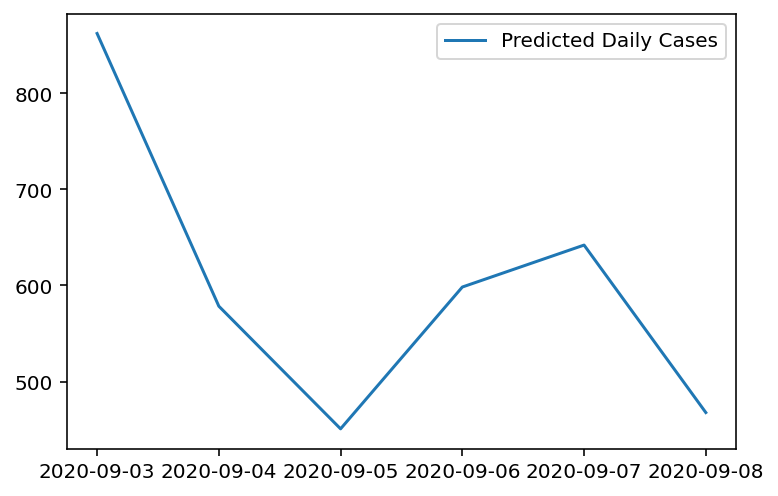

In [57]:
predicted_index = pd.date_range(
  start=daily_cases.index[-1],
  periods=DAYS_TO_PREDICT + 1,
  closed='right'
)
predicted_cases = pd.Series(
  data=predicted_cases,
  index=predicted_index
)
plt.plot(predicted_cases, label='Predicted Daily Cases')
plt.legend();

In [58]:
predicted_cases

2020-09-03    862.363916
2020-09-04    578.422341
2020-09-05    450.716294
2020-09-06    598.364174
2020-09-07    642.048270
2020-09-08    467.665982
Freq: D, dtype: float64

In [59]:
# fig = px.line(canada, x="Date", y="New cases", title='Daily new Cases in Canada')
# fig.show()

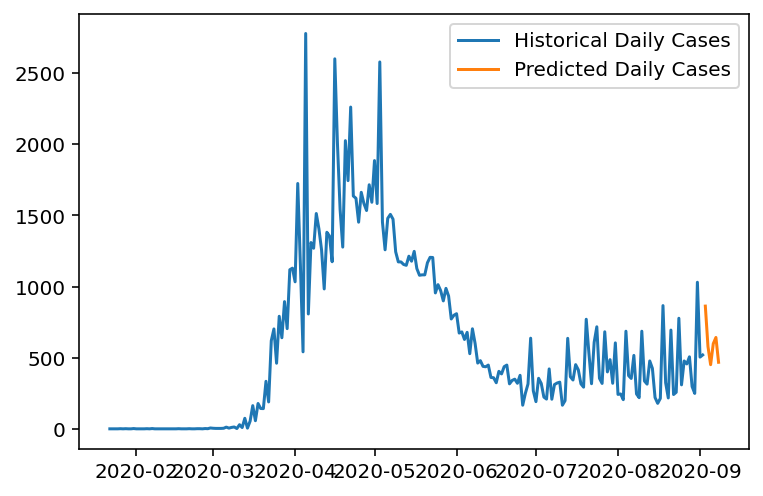

In [60]:
plt.plot(daily_cases, label='Historical Daily Cases')
plt.plot(predicted_cases, label='Predicted Daily Cases')
plt.legend();